In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
irisModule = load_iris()
dataset = np.array(irisModule.data)
print(dataset)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### First of all, we will load the iris module and transform the dataset into a matrix. The dataset contains 4 variables with 150 examples. Hence, the dimensionality of our data matrix is: (150, 4).

In [3]:
covarianceMatrix = pd.DataFrame(data = np.cov(dataset, rowvar = False), columns = irisModule.feature_names,
                                index = irisModule.feature_names)
print(covarianceMatrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  


### We’re not interested in the main diagonal, because they are the variance of the same variable. Since we’re trying to find new patterns in the dataset, we’ll ignore the main diagonal. Since the matrix is symmetric, covariance(a,b) = covariance(b,a), we will look only at the top values of the covariance matrix (above diagonal). Something important to mention about covariance: if the covariance of variables a and b is positive, that means they vary in the same direction. If the covariance of a and b is negative, they vary in different directions.

### The eigenvector associated with the largest eigenvalue indicates the direction in which the data has the most variance. Hence, using eigenvalues we will know what eigenvectors capture the most variability in our data.

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)
print(eigenvalues)
print('\n')
print(eigenvectors)

[4.22824171 0.24267075 0.0782095  0.02383509]


[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


### This is the vector of the eigenvalues, the first index at eigenvalues vector is associated with the first index at eigenvectors matrix.

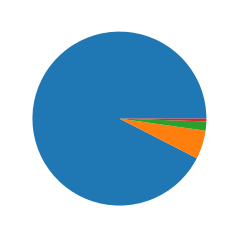

[0.9246187232017271, 0.05306648311706787, 0.017102609807929738, 0.005212183873275305]


In [6]:
totalSum = sum(eigenvalues)
variablesExplained = [(i / totalSum) for i in sorted(eigenvalues, reverse = True)]
import matplotlib.pyplot as plt
plt.pie(variablesExplained)
plt.show()
print(variablesExplained)

### As you can clearly see the first and eigenvalue takes 92.5% and the second one takes 5.3%, and the third and forth don’t cover much data from the total dataset. Therefore we can easily decide to remain with only 2 variables, the first one and the second one.

In [7]:
featureVector = eigenvectors[:,:2]
print(featureVector)

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


### Let’s remove the third and fourth variables from the dataset. Important to say that at this point we lose some information. It is impossible to reduce dimensions without losing some information (under the assumption of general position). PCA algorithm tells us the right way to reduce dimensions while keeping the maximum amount of information regarding our data.       And the remaining data set looks as shown above!!



### We want to build a new reduced dataset from the K chosen principle components. We’ll take the K chosen principles component (k=2 here) which gives us a matrix of size (4, 2), and we will take the original dataset which is a matrix of size (150, 4).

In [8]:
featureVectorTranspose = np.transpose(featureVector)
datasetTranspose = np.transpose(dataset)
newDatasetTranspose = np.matmul(featureVectorTranspose, datasetTranspose)
newDataset = np.transpose(newDatasetTranspose)
print(newDataset)

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.73787684]
 [ 2.8535028  -6.1403164 ]
 [ 2.90362838 -6.42009834]
 [ 2.86543825 -5.20563023]
 [ 2.63612348 -5.39631705]
 [ 2.87712708 -5.9263226 ]
 

### To get above result we'll perforn matrices multiplication in the given way:
The first matrix we take is the matrix that contains the K component principles we’ve chosen and we transpose this matrix.
The second matrix we take is the original matrix and we transpose it.
At this point, we perform matrix multiplication between those two matrices.
After we perform matrix multiplication we transpose the result matrix.

## CONCLUSION:
    In our data set, we did not cause serious impact because we removed only 2 variables out of 4. But let’s assume we have 200 variables in our data set, and we reduced from 200 variables to 3 variables — it’s already becoming more meaningful.